In [1]:
import os
import sys

# Add project root to path
PROJECT_ROOT = os.path.abspath(os.path.join(".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

PLOTS_DIR = "../plots"
RESULTS_DIR = "../results"

os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

In [2]:
from src.data_io import load_csv

In [3]:
from src.regime import RegimeModel

In [4]:
import os

In [5]:
# 05. Regime Detection

In [6]:
df = load_csv('data/processed/nifty_features_5min.csv')

Loaded 126 rows from F:\antigravity\klypto assignment\data/processed/nifty_features_5min.csv


In [7]:
df = df.dropna()

In [8]:
# Features for Regime

In [9]:
feats = ['avg_iv', 'iv_spread', 'ema_5']

In [10]:
# Check availability

In [11]:
valid_feats = [f for f in feats if f in df.columns]

In [12]:
if not valid_feats:
    print('Warning: No features for regime. Using returns.')
    valid_feats = ['returns']

In [13]:
X = df[valid_feats].values

In [14]:
# Train

In [15]:
model = RegimeModel()

In [16]:
model.fit(X[:int(0.7*len(X))])
regimes = model.predict(X)
import pandas as pd; pd.Series(regimes).value_counts()

Model is not converging.  Current: 164.21131394599396 is not greater than 220.32713972778114. Delta is -56.11582578178718


2    29
0     1
1     1
Name: count, dtype: int64

In [17]:
# Save Model

In [18]:
os.makedirs('../models', exist_ok=True)

In [19]:
model.save('../models/regime_hmm.joblib')

In [20]:
print('Saved regime model')

Saved regime model


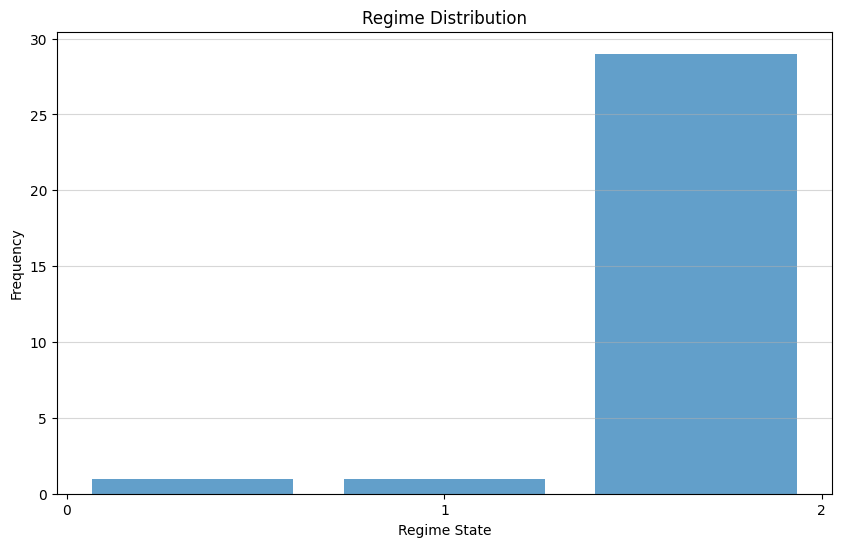

In [21]:
# Plot Regime Distribution
import matplotlib.pyplot as plt

regimes = model.predict(X)
plt.figure(figsize=(10, 6))
plt.hist(regimes, bins=3, alpha=0.7, rwidth=0.8)
plt.title('Regime Distribution')
plt.xlabel('Regime State')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])
plt.grid(axis='y', alpha=0.5)
plt.savefig(f"{PLOTS_DIR}/regime_distribution.png")
plt.show()
plt.close()